In [ ]:
# follow site
# https://medium.com/alex-attia-blog/the-simpsons-character-recognition-using-keras-d8e1796eae36
# https://www.kaggle.com/code/hartlehar/simpsons-character-identifier

+ **이미지 분석 방향**
  + [x] Image Classification
  + [ ] Image Segmentation
  + [ ] Object detection
  + [ ] Visual Embedding

<img src="https://149695847.v2.pressablecdn.com/wp-content/uploads/2017/09/localizationVsDetection.png" position="relative" width="600">

---

+ **Index**
  + [ ] data read(read image)
  + [ ] dataset split
  + [ ] image size normailzation
  + [ ] modeling
  + [ ] train/save
  + [ ] evaluation
  + [ ] predict/vizualization


In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import cv2, keras
import tensorflow as tf
import PIL
from PIL import Image
import os 

In [18]:
from keras import backend as K
from keras.optimizers import Adam, SGD, RMSprop
from keras.layers import Flatten, Dense, Input, Conv2D, MaxPooling2D, Dropout
from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, TimeDistributed
from keras.utils.layer_utils import get_source_inputs
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.metrics import categorical_crossentropy

from keras.models import Model
from keras.utils import generic_utils
from keras.layers import Layer, InputSpec
from keras import initializers, regularizers

In [33]:
labels = pd.read_csv(r'C:\Users\khpark\archive\train_lables.csv')
labels['filename']= labels['filename'].str.replace('./characters', '')

In [51]:
labels.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,/abraham_grampa_simpson/pic_0000.jpg,NaN,NaN,abraham_grampa_simpson,57,72,52,72
1,/abraham_grampa_simpson/pic_0001.jpg,NaN,NaN,abraham_grampa_simpson,80,31,337,354
2,/abraham_grampa_simpson/pic_0002.jpg,NaN,NaN,abraham_grampa_simpson,128,48,285,407
3,/abraham_grampa_simpson/pic_0003.jpg,NaN,NaN,abraham_grampa_simpson,72,126,158,275
4,/abraham_grampa_simpson/pic_0004.jpg,NaN,NaN,abraham_grampa_simpson,123,61,294,416


In [68]:
def display_image(path, box=None, specific=False):  
    # print(int(box['xmin']), int(box['ymin']), int(box['xmax']-box['xmin']), int(box['ymax']-box['ymin']))
    if not specific:
        # plt.imshow(Image.open(path))
        img = Image.open(path)
        fig, ax = plt.subplots()
        rect = patches.Rectangle((int(box['xmin']), int(box['ymin'])), int(box['xmax']-box['xmin']), int(box['ymax']-box['ymin']), linewidth=5, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.imshow(img)
        plt.show()
    else:
        # plt.imshow(path)
        fig, ax = plt.subplots()
        ax.imshow(path)
        for i in box:
            rect = patches.Rectangle((int(i[0]-(i[2]/2)), int(i[1]-(i[3]/2))), int(i[2]), int(i[3]), linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
        plt.show()

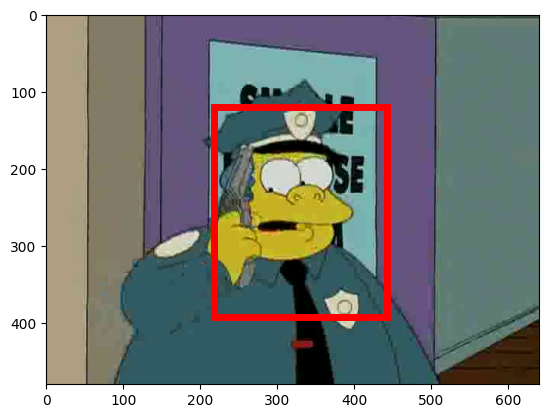

In [75]:
path = r'C:/Users/khpark/archive/simpsons_dataset'

i = -200

display_image(path + labels['filename'].iloc[i], box =labels.iloc[i] )

In [77]:
import tensorflow_hub as hub

model = hub.load("https://tfhub.dev/rishit-dagli/faster-rcnn-cppe5/1")

In [80]:
hub_layer = hub.KerasLayer("https://tfhub.dev/rishit-dagli/faster-rcnn-cppe5/1")

In [81]:
hub_layer.